<a href="https://colab.research.google.com/github/vlad98rus/my_work/blob/main/bee_vs_wasp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Напишите нейронную сеть по классификации пчёл и ос, БЕЗ использования библиотеки Keras (используйте только TensorFlow 2.0).

Фото пчёл находятся в папке bee, а фото ос находятся в папке wasp.
           
Мы не ждём от Вас высокой точности сети, это будет проверка на взаимодействие, понимание задания и подход к обработке базы.



In [1]:
import zipfile                                                                            # библиотека для работы с zip архивами
import os                                                                                 # Библиотека для работы с файловой ситемой

from google.colab import drive                                                            # модуль для работы с Google Disc

import cv2
import numpy as np                                                                        
import pandas as pd                                                                       
import matplotlib.pyplot as plt                                                           
import seaborn as sns
import imgaug.augmenters as iaa

from pathlib import Path                                                      
from glob import glob

from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.1


In [3]:
# подключаем Google Disc / или прописываем свой путь к папке с данными
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
zip_file = '/content/drive/MyDrive/bee_VS_wasp.zip'

# распаковываем архив
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

# просмотр результата разархивации
print (os.listdir())

['.config', 'val', 'train', 'test', 'drive', 'sample_data']


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_dir_test_bee = Path('/content/test/bee')
data_dir_test_wasp = Path('/content/test/wasp')

data_dir_train_bee = Path('/content/train/bee')
data_dir_train_wasp = Path('/content/train/wasp')

data_dir_val_bee = Path('/content/val/bee')
data_dir_val_wasp = Path('/content/val/wasp')

# Получиv список всех изображений
images_test_bee = list(data_dir_test_bee.glob('*.jpg'))
images_test_wasp = list(data_dir_test_wasp.glob('*.jpg'))

images_train_bee = list(data_dir_train_bee.glob('*.jpg'))
images_train_wasp = list(data_dir_train_wasp.glob('*.jpg'))

images_val_bee = list(data_dir_val_bee.glob('*.jpg'))
images_val_wasp = list(data_dir_val_wasp.glob('*.jpg'))

print('Number of images test bee: ', len(images_test_bee))
print('Number of images test wasp: ', len(images_test_wasp))

print('Number of images train bee: ', len(images_train_bee))
print('Number of images train wasp: ', len(images_train_wasp))

print('Number of images val bee: ', len(images_val_bee))
print('Number of images val wasp: ', len(images_val_wasp))

Number of images test bee:  371
Number of images test wasp:  320
Number of images train bee:  1727
Number of images train wasp:  1486
Number of images val bee:  371
Number of images val wasp:  320


##Просмотрим наш датасет

##Тренировочная выборка

Shape of images_train_bee:  (213, 320, 3)
Shape of images_train_bee:  (240, 320, 3)
Shape of images_train_bee:  (284, 320, 3)
Shape of images_train_bee:  (273, 320, 3)


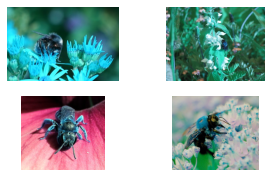

In [7]:
#ПЧЕЛЫ
sample_images_train_bee = images_train_bee[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images_train_bee[i]))
    print('Shape of images_train_bee: ', img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

Shape of images_train_wasp:  (267, 400, 3)
Shape of images_train_wasp:  (240, 320, 3)
Shape of images_train_wasp:  (213, 320, 3)
Shape of images_train_wasp:  (240, 240, 3)


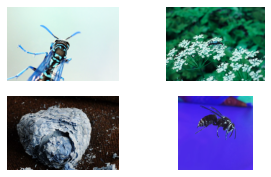

In [11]:
#ОСЫ
sample_images_train_wasp = images_train_wasp[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images_train_wasp[i]))
    print('Shape of images_train_wasp: ', img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

##Тестовая выборка.


Shape of images_test_bee:  (207, 240, 3)
Shape of images_test_bee:  (240, 195, 3)
Shape of images_test_bee:  (213, 319, 3)
Shape of images_test_bee:  (240, 240, 3)


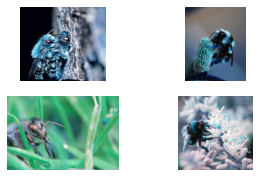

In [15]:
#ПЧЕЛЫ
sample_images_test_bee = images_test_bee[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images_test_bee[i]))
    print('Shape of images_test_bee: ', img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

Shape of images_test_wasp:  (214, 320, 3)
Shape of images_test_wasp:  (240, 320, 3)
Shape of images_test_wasp:  (240, 320, 3)
Shape of images_test_wasp:  (240, 233, 3)


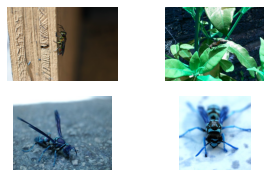

In [10]:
#ОСЫ
sample_images_test_wasp = images_test_wasp[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images_test_wasp[i]))
    print('Shape of images_test_wasp: ', img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

##Проверочная выбрка

Shape of images_val_bee:  (213, 319, 3)
Shape of images_val_bee:  (240, 235, 3)
Shape of images_val_bee:  (213, 319, 3)
Shape of images_val_bee:  (226, 320, 3)


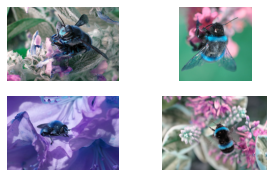

In [8]:
#ПЧЕЛЫ
sample_images_val_bee = images_val_bee[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images_val_bee[i]))
    print('Shape of images_val_bee: ', img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

Shape of images_val_wasp:  (213, 320, 3)
Shape of images_val_wasp:  (248, 320, 3)
Shape of images_val_wasp:  (240, 180, 3)
Shape of images_val_wasp:  (239, 180, 3)


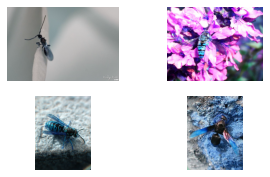

In [12]:
#ОСЫ
sample_images_val_wasp = images_val_wasp[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images_val_wasp[i]))
    print('Shape of images_val_wasp: ', img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

## Начинаем работу

In [16]:
# Создадим список всех изображений
bee_cases = data_dir_train_bee.glob('*.jpg')
wasp_cases = data_dir_train_wasp.glob('*.jpg')

# Создадим пустой список. Мы вставим данные в этот список в формате (img_path, label)
train_data = []

# Отметим наши изображения в bee_cases как 0
for img in bee_cases:
    train_data.append((img,0))

# Отметим наши изображения в wasp_cases как 1
for img in wasp_cases:
    train_data.append((img, 1))

# Создадим из нашего списка датафрейм данных pandas 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Перемешаем наши данные
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Посмотрим что получилось
train_data.head(15)

,image,label
0,/content/train/wasp/7494525410_f3f7ea25ae_n.jpg,1
1,/content/train/bee/5982338208_fba181d76b_n.jpg,0
2,/content/train/bee/28890211636_3d3db71fe8_n.jpg,0
3,/content/train/bee/33546188515_6bb67b8e50_w.jpg,0
4,/content/train/bee/29213855572_c0d5c85d7b_n.jpg,0
5,/content/train/bee/30114056458_b82fe2191a_n.jpg,0
6,/content/train/bee/8716414887_670b19cff8_n.jpg,0
7,/content/train/bee/19921988100_25c08e8f27_n.jpg,0
8,/content/train/wasp/30211972961_bc36c43592_n.jpg,1
9,/content/train/wasp/13856654883_10b2c0afc6_n.jpg,1


0    1727
1    1486
Name: label, dtype: int64


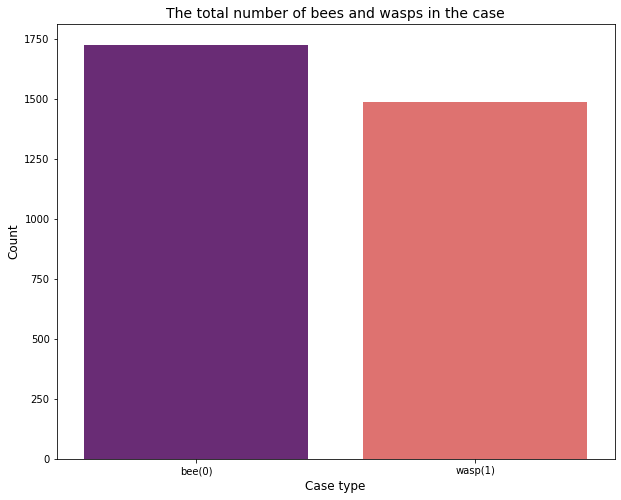

In [20]:
# Произведем подсчет количества пчел и ос в нашем кейсе
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x = cases_count.index,  y= cases_count.values, palette="magma")
plt.title('The total number of bees and wasps in the case', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['bee(0)', 'wasp(1)'])
plt.show()

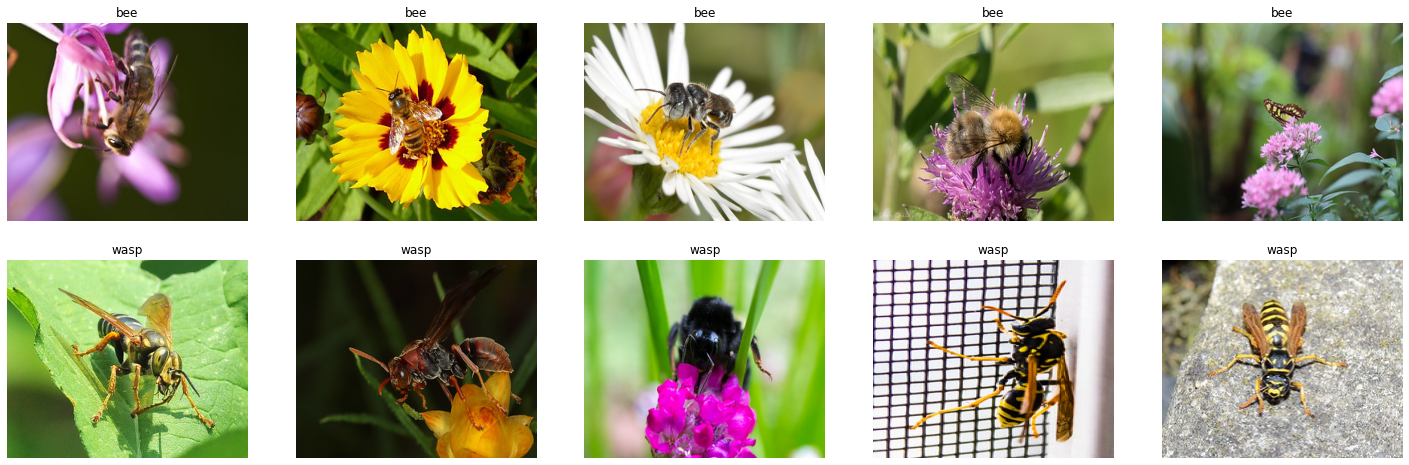

In [22]:
bee_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
wasp_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()


# соеденим наши образцы
samples = bee_samples + wasp_samples
del bee_samples, wasp_samples

# выводим на печать 
f, ax = plt.subplots(2,5, figsize=(25,8))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("bee")
    else:
        ax[i//5, i%5].set_title("wasp")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()